<a name='0'></a>

# Convolutional Neural Networks(CNNs)

Convolutional neural networks(also called ConvNets), aka convnets are a special type of neural network architectures that are designed mostly for image recognition tasks. Convnets are also used for sequential data such as time series and texts. 

As the name implies, convolutional neural networks use a convolutional operation. 

The first Convnet architecture was [LeNet-5](http://vision.stanford.edu/cs598_spring07/papers/Lecun98.pdf) by Yann LeCun. LeNet-5 was used for document recognition in 1998. Since 2012, after [AlexNet](https://proceedings.neurips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf) won the Imagenet challenge of 2012, ConvNets have been the go-to architecture for image recognition tasks.

This is the introduction to convolutional neural networks.

### What's in here: 

* [1. Looking back at Fully Connected Layers](#1)
* [2. Typical Components of ConvNets](#2)

    * [2.1 Convolutional Layer](#2-1)
    * [2.2 Pooling Layer](#2-2)
    * [2.3 Fully Connected Layer](2-3)
* [3. Batch Normalization for ConvNets](#3)
* [4. Other Types of Convolution Layers](#4)
* [5. Coding ConvNets:Cifar10 Classification](#5)
    * [5.1 Gathering Data](#5-1)
    * [5.2 Gathering Data](#5-2)
    * [5.3 Looking in the Data](#5-3)
    * [5.4 Preparing the Data](#5-4)
    * [5.5 Creating and Training Model](#5-5)
    * [5.6 Visualizing the Results](#5-6)
    * [5.7 Improving Model](#5-7)
* [6. Final Notes](#6)

<a name='1'></a>
## 1. Looking Back at Fully Connected Layers

In the previous section, we used fully connected layers, also called densely connected layers to classify fashion mnist dataset. 

As it turns out, fully connected layers are not good at learning image features. This is because the images pixels to be fed to these networks have to be flattened to be in one dimensional column vector(the input of the fully connected layers must be in a column vector format). Take an example: the images in fashion mnist have `28X28` grayscale. This means that our input format will be `784X1`. 

The resulting effects of flattening the input image is that the network can not preserve the spatial features contained in the images. As also a consequence, they end up having too many parameters which is not a good thing for the performance of the network. 

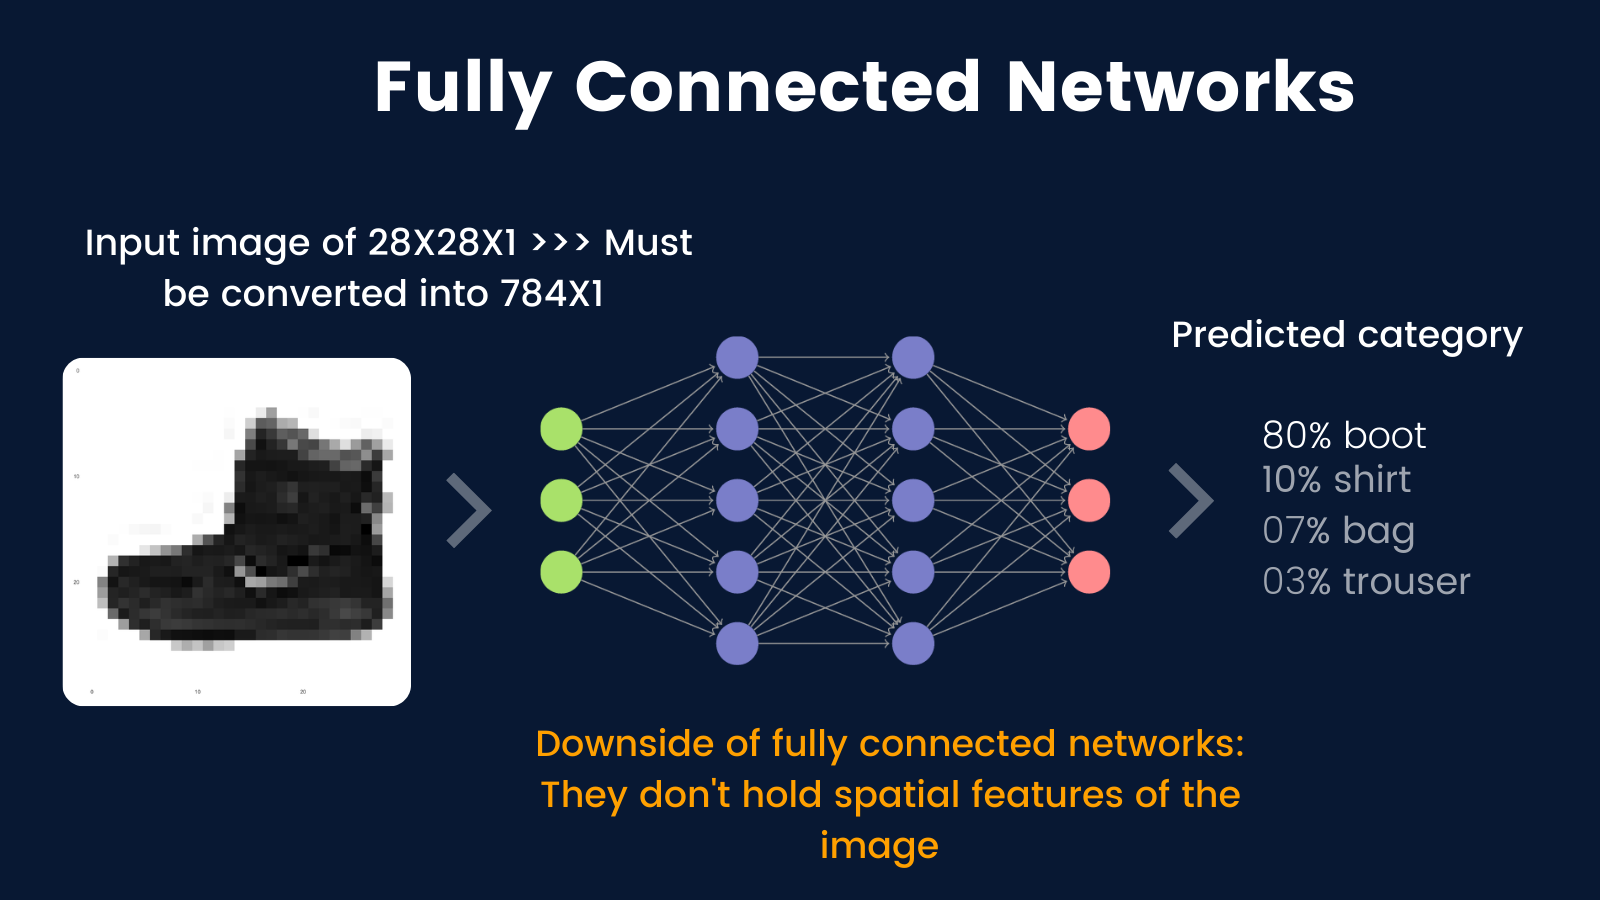


The lack of ability of fully connected layers to learn spatial features makes them less efficient in image recognition tasks. And that's the motivation of convolutional neural networks.

<a name='2'></a>
## 2. Components of a Typical ConvNets

A Typical ConvNet is made of convolutional layers, pooling layers, and fully connected layers. These are the main components although they can have other layers such as batch normalization for regularization purpose. We will also talk about batch normalization.

!['cnn'](https://stanford.edu/~shervine/teaching/cs-230/illustrations/architecture-cnn-en.jpeg?3b7fccd728e29dc619e1bd8022bf71cf)

Image: A typical component of convolutional neural networks. Source: [CS 230 - Deep Learning, CNN cheatsheet](https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-convolutional-neural-networks)



<a name='2-1'></a>
### 2.1 Convolutional Layer

A convolutional layer is the main component of a convolutional neural network. 

A convolutional layer uses filters or kernels to extract features from the input image through a convolution operation. The output of convolution are called feature maps or activation maps. 

The convolutional filters learn the low-level features such as lines, edges and high-level features such as face, ear, and nose (for an input image of a human for example). The high level features distinguish one image from another and are what later become useful during image recognition.


A convolutional layer performs an elementwise dot product between input image pixels and each unique filter. Put it in other way, we pass the filter to each pixel in the input image(the center value of filter aligning with such particular pixel), we multiply the corresponding pixels and filter values(or weights) and then we calculate the sum, such sum making the new pixel. We repeat the process until the filter is slided over all image pixels.

!['conv-operation'](https://stanford.edu/~shervine/teaching/cs-230/illustrations/convolution-layer-a.png?1c517e00cb8d709baf32fc3d39ebae67)

Image: Convolution operation, source: [CS230 CNN cheatsheet](https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-convolutional-neural-networks). 

For a more intuitive illustration of convolution, see below:

!['conv'](https://poloclub.github.io/cnn-explainer/assets/figures/convlayer_detailedview_demo.gif)

Image: Convolution process, [Source](https://poloclub.github.io/cnn-explainer/).

Image: Convolution filter is slided over all image pixels, at each instance computing element wise dot product. Source: [Basic Image Processing, Virginia](https://www.cs.virginia.edu/~vicente/recognition/notebooks/image_processing_lab.html).

Convolutional neural networks can be trained with gradient descent. The magical thing about them is that they can automatically determine the appropriate filters that are right for the input image. More concretely, during the training, the filter values are updated (just like weights are in fully connected networks). At each step of the training, and as images are being fed into CNN, the values of each filter are updated slowly towards the values that minimize the loss/cost function.


To summarize a convolutional layer, let's use this illustration from Justin Johnson. 



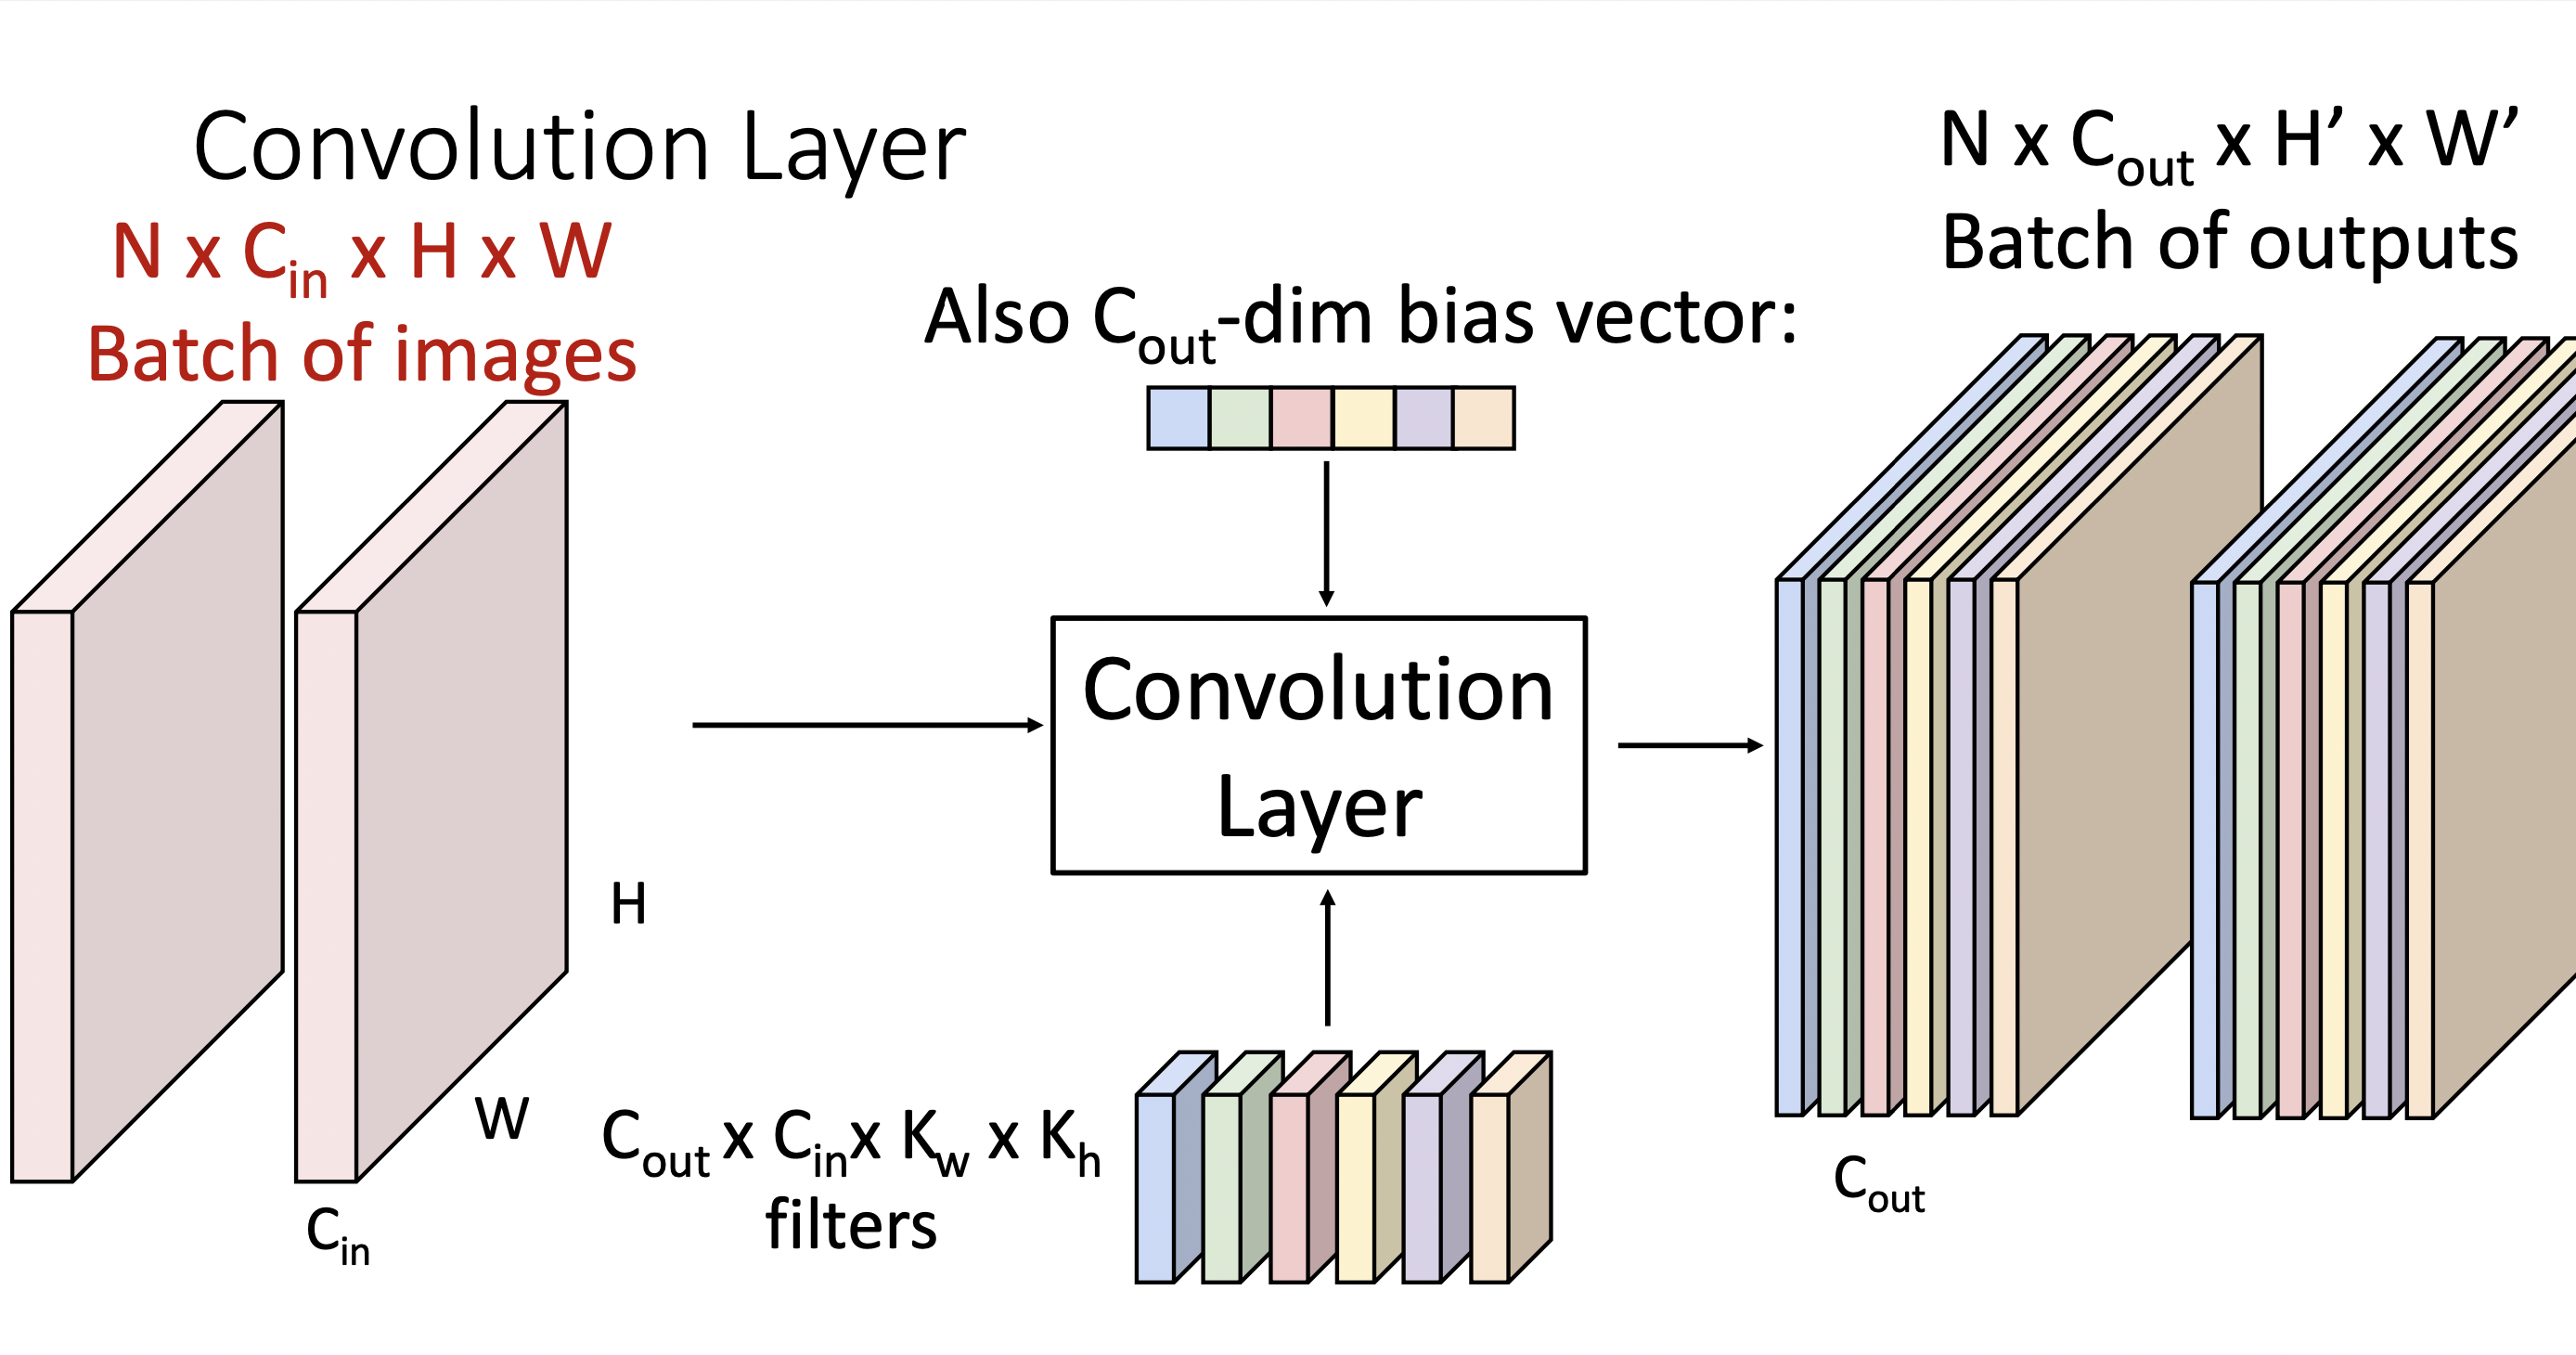

From the above image, we see that the batches of images `N`, each image having channels `Cin`, height `H`, and width `W` is fed to a convolutional layer having a filter of channel size `Cout`, width `Kw` and height `Kh` to produce activation or feature maps having same bath size `N`, channel out `Cout`, output height `H'`, and output width `W'`. 

The size of feature or activation maps is equivalent to the number of filters `Cout`.


#### The Hyperparameters of A Convolution Layer

A convolution layer has 5 main hyperparameters that are:     

* **The number of filters** to be used in a convolution operation. The number of activation maps or feature maps at the output of convolution layer is equivalent to the number of filters at the input of the convolution layer. There is no proper guide on how many filters you should have but they are typically doubled layer after a layer like 32, 64, 128, 256.


* **The size of filters** or kernel which is a dimension of the filter to be slided to image. The small kernel size is able to extract much information than large kernel size. Therefore, in image recognition tasks, a small kernel size such as (3,3) or (5,5) is preferred over large kernel sizes.

* **Stride** which denotes the number of pixels that the filter should shift after each convolution operation. A default stride for a convolution layer is 1 and it works pretty great. 

* Padding is also an important hyperparameters. Without padding, the pixels at the borderline of the image can not undergo convolution. We use padding to conserve those pixels and it leads to better performance. The commonly used padding type is zero padding, where we add zeros at the outer part of the image. As this [paper](https://arxiv.org/pdf/1811.11718.pdf) from NVIDIA scientists noted, zero-padding is simple and it is computational effecient. 

* Activation function to add non-linearity to the network. Convolution operation is a linear type operation. So, just like we use activations in feed forward networks networks/fully connected to prevent the network from being a linear classifier,  non-linear activation functions are also needed in a convolution layer to achieve the same purpose which is adding non linearity into the network. The commonly used activation function is ReLU. It is known to work great and it train faster. One last thing to not: the activation function is applied to the output of the convolution. 


Here is a [2D convolution layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) in TensorFlow. 

```
tf.keras.layers.Conv2D(
    filters, kernel_size, strides=(1, 1), padding='valid',
    data_format=None, dilation_rate=(1, 1), groups=1, activation=None,
    use_bias=True, kernel_initializer='glorot_uniform',
    bias_initializer='zeros', kernel_regularizer=None,
    bias_regularizer=None, activity_regularizer=None, kernel_constraint=None,
    bias_constraint=None, **kwargs
)
```


In real world applications, we typically use many filters (sometime above 32, 64, 128, etc..). The larger the filters, the larger the feature maps, and the slower the training can be if we don't downsample the convolution output. 

Let's review the layer that usually follow the convolution layer to compress the feature maps.

<a name='2-2'></a>
### 2.2 Pooling Layer

Pooling layer is used for downsampling or shrinking purpose. Using a large number of stride can also downsample the size of the feature maps, but pooling is preferred because it doesn't have parameters.

In most ConvNets architectures, pooling layer typically comes after a convolution layer. 

Adding a pooling layer to a network reduce its size. Thus, it can help the network to train faster and to overall produce great results. 

There are two main types of pooling that are maxpooling and average pooling. Below illustrations shows the maxpooling and average pooling operations.

Maxpooling: At each pooling operation, the maximum pixels are selected

!['maxpool'](https://stanford.edu/~shervine/teaching/cs-230/illustrations/max-pooling-a.png?711b14799d07f9306864695e2713ae07)


Average pooling: At each pooling operation, the average of pixels is computed
!['avg-pool'](https://stanford.edu/~shervine/teaching/cs-230/illustrations/average-pooling-a.png?58f9ab6d61248c3ec8d526ef65763d2f)

Source: [Stanford CS230 Cheatsheet](https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-convolutional-neural-networks#layer).

Both maxpooling and average pooling have only one main hyperparameter which is pooling size. Maxpooling is the commonly used pooling option and the typical pooling size is (2,2). 

Here is maxpooling in TensorFlow
```
tf.keras.layers.MaxPool2D(
    pool_size=(2, 2), strides=None, padding='valid', data_format=None,
    **kwargs
)
```

and here is average pooling
```
tf.keras.layers.AveragePooling2D(
    pool_size=(2, 2), strides=None, padding='valid', data_format=None,
    **kwargs
)
```


If you would like to see more graphical representation of different pooling options, check these amazing animations by [Vincent Dumoulin](https://github.com/vdumoulin/conv_arithmetic). 

<a name='2-3'></a>
### 2.3 Fully Connected Layers

We have seen that fully connected layers alone are not enough for learning useful features in images, but when stacked under convolution and pooling layers, they make convnets complete. More specifically, fully connected layers are used for classifying the extracted features using a softmax or sigmoid activation functions. 

Before fully connected layers, we typically insert a flattening layer to convert the output of pooling layer that are in 3D into 1D dimensional vector. This step is important because fully connected layers operate on flattened inputs. 

There are no limits to the number of fully connected layers that should be used at the end of the convolutional neural networks, but in most cases, they are usualy 1-3, and the last layer must have a sofmax activation function (for multiclass problems) or a sigmoid activation for binary and multi-label classification problems.

Here is a great illustrations of fully connected layers. The illustration is borrowed from CS230 cheatsheet that we have been using. 

!['fullyc'](https://stanford.edu/~shervine/teaching/cs-230/illustrations/fully-connected-ltr.png?32caf9e07c79d652faa292812579d063)




To summarize, any typical convnet is made of convolution layer for extracting features in image using filters, pooling layers for shrinking or compressing the feature or activation maps, and fully connected layers for classification. Below illustration serves as a nice summary for ConvNets.

!['convnets'](https://cs231n.github.io/assets/cnn/convnet.jpeg)
Image: Components of ConvNets: Convolution - Pooling - Fully connected layers, source: CS231N CNNs for Visual Recognition.

But these are not enough. It is extremely hard to train a deep neural networks without running into problems we saw earlier like overfitting and vanishing/exploding gradients. One way to also increase the capacity of the network is to use Batch normalization layer. Let's learn about it in the next section. 

But there is one more thing: If you would like to practice what we have already seen so far, I recommend you play with [ConvNetJS](https://cs.stanford.edu/people/karpathy/convnetjs/) demos in browser. ConvNetJS allows you to train convolutional neural networks in your browser. It was designed by Karpathy. 

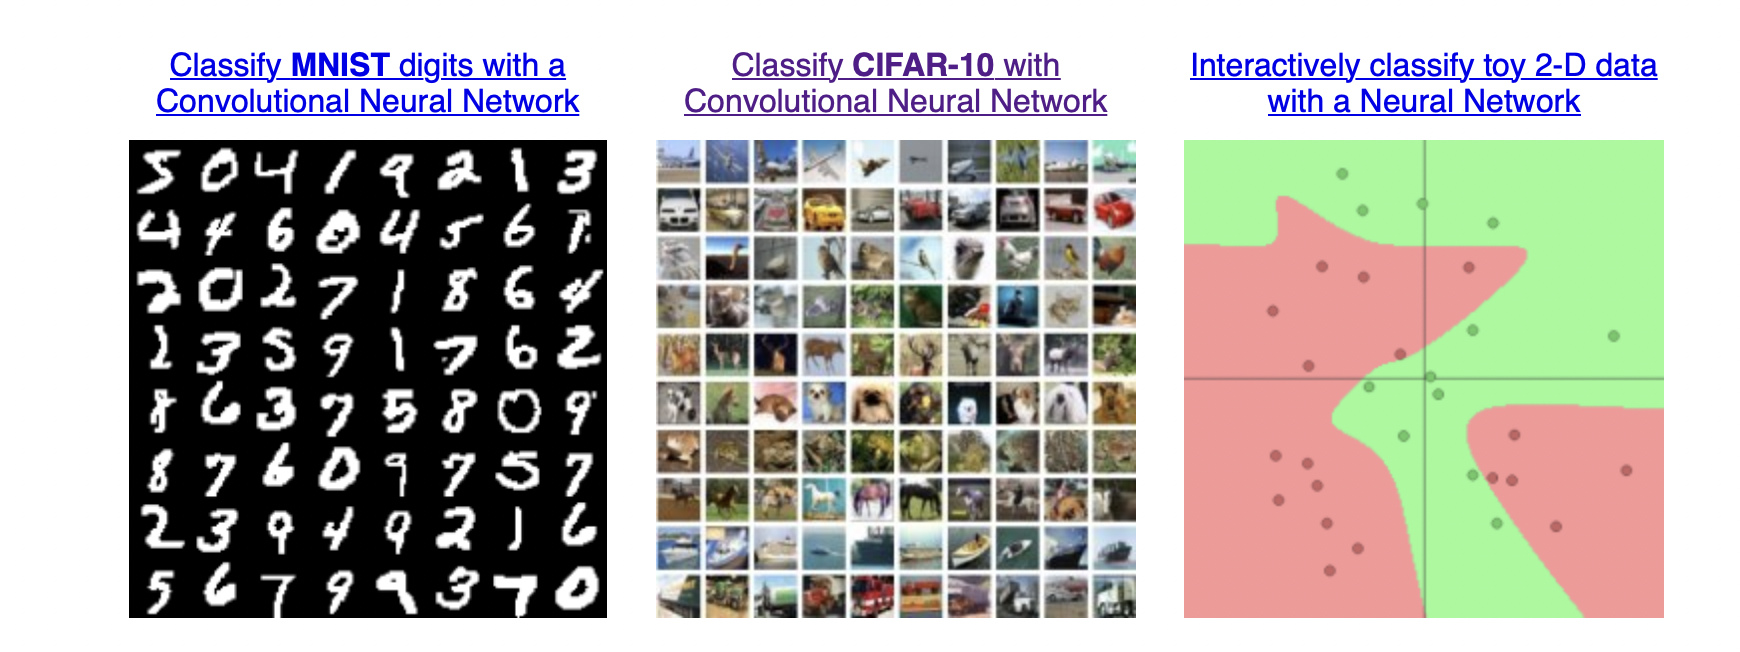

Some of the Convnet demos available at [ConvNetJS](https://cs.stanford.edu/people/karpathy/convnetjs/)  by Andrej Karpathy. 

<a name='3'></a>
## 3. Batch Normalization for ConvNets

Deep neural etworks are extremely hard to train. They tend to overfit(memorize training data and fail on test data), and sometime, gradients can be unstable(vanish or explode). 

Batch normalization can help us to overcome above challenges. The idea of batch normalization is to normalize the output of a layer in order to have zero mean and unit variance. The Batch Normalization [paper](https://arxiv.org/abs/1502.03167) called such idea as reducing the `internal covariate shift`.

Batch normalization can be inserted right after a fully connected or a convolution layer, but before an activation function. When used as the first layer, it can also remove the need of scaling the input data to a neural network since that what it does in essence.

Below is a formula of batch normalization. 

$$\mathrm{BN}(\mathbf{x}) = \boldsymbol{\gamma} \odot \frac{\mathbf{x} - \hat{\boldsymbol{\mu}}_\mathcal{B}}{\hat{\boldsymbol{\sigma}}_\mathcal{B}} + \boldsymbol{\beta}.$$

Explaining the above formula:

* $BN(x)$ is the normalized output of a layer
* ${\gamma}$ is the output scaling parameter. It can be updated during backpropogation like other model parameters(weights & biases).
* ${\odot}$ denotes element wise multiplication. 
* $x$ is the input data to a batch normalization layer.
* $\hat{\boldsymbol{\mu}}_\mathcal{B}$ is the sample mean vector calculated over a mini-batch $B$.
* $\hat{\boldsymbol{\sigma}}_\mathcal{B}$ is the input standard deviation calculated over the a minibatch $B$.
* $\boldsymbol{\beta}$ is the output shift paramater that can also be learned during the model training process like other model parameters. 

As the above $BN(x)$ formula shows, the output of the batch normalization is zero-centered and normalized input $x$ that is scaled and shifted with  ${\gamma}$ and ${\beta}$ respectively.





The formula and intuition behind batch normalization is adapted from [chapter 7 of Dive into Deep Learning book](https://d2l.ai/chapter_convolutional-modern/batch-norm.html). For more about theories behind it, you can read the whole section of batch normalization.

Just like other dropout layer, batch normalization behaves differently during training and test time. At test time, the mean and variance of the entire training set (instead of minibatch) are used. The fact that the training and testing behaviours are different can be a source of errors though.


Although the idea behind batch normalization is not clearly understood(it's only just that it reduces internal covariate shift 🤷‍♂️), it is a very useful technique when training large networks. Below are advantages of batch normalization:    

* It makes it easier to train deep neural networks.
* It allows high learning rates resulting into faster convergence.
* It minimize the gradients instability problems.
* It acts as a regularization technique (but should not be used with dropout).

Batch normalization layer is implemented in modern deep learning libraries. In TensorFlow, it is implemented as:  

```
tf.keras.layers.BatchNormalization(
    axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True,
    beta_initializer='zeros', gamma_initializer='ones',
    moving_mean_initializer='zeros',
    moving_variance_initializer='ones', beta_regularizer=None,
    gamma_regularizer=None, beta_constraint=None, gamma_constraint=None, **kwargs
)
```

More on the above implementation [here](https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization). 

<a name='4'></a>
## 4. Other Types of Convolution Layers

So far, we have talked about 2D convolution for 2D image data. But there are other types of convolution layers that are 1D convolution and 3D convolution. 

1D convolution is mostly used in timeseries and texts based applications, whereas, 3D convolution is used in 3D data such as videos, volumetrics data like medical scans, etc. We will learn more about 3D CNNs in later parts. 

Here are implementations of 1D and 3D convolution in TensorFlow:

1D Convolution

```python
tf.keras.layers.Conv1D(filters, kernel_size, strides=1, padding="valid",
data_format="channels_last", dilation_rate=1, groups=1, activation=None,
use_bias=True, kernel_initializer="glorot_uniform", 
bias_initializer="zeros", kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None,
kernel_constraint=None, bias_constraint=None, **kwargs
)
```
3D Convolution

```python
tf.keras.layers.Conv3D(filters, kernel_size, strides=(1, 1, 1),padding="valid", data_format=None, dilation_rate=(1, 1, 1), groups=1,
activation=None, use_bias=True, kernel_initializer="glorot_uniform",
bias_initializer="zeros", kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None,
kernel_constraint=None, bias_constraint=None, **kwargs)




<a name='5'></a>
## 5. Coding ConvNets: Cifar10 Classification

So far, all we have been seeing are theories about ConvNets. To solidify the things that we learned, let's put them into practice. 



<a name='5-1'></a>
### 5.1 Set up

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Versions of TensorFlow and TFDS

print(f'The Version of TensorFlow: {tf.__version__}')
print(f'The Version of TensorFlow Datasets: {tfds.__version__}')

The Version of TensorFlow: 2.7.0
The Version of TensorFlow Datasets: 4.0.1


<a name='5-2'></a>
### 5.2 Gathering Data

We will use Cifa10 dataset. We can either get it from [tf.keras.datasets](https://keras.io/api/datasets/) or [TensorFlow Datasets](https://www.tensorflow.org/datasets). TensorFlow Datasets contains many ready-to-use image (and other) datasets and it offers some data processing functions. Let's gather cifar10 dataset from TF Dataset then. 

Here are important notes about loading data from TensorFlow Datasets:      

* The first thing is to provide the name of the data to load. The names of all datasets are available in [TFDS Catalog](https://www.tensorflow.org/datasets/catalog/overview).
* While loading the data, we can directly split it into train, validation and test set with `split` parameter.  Training set is used for training the model, validation set is for evaluating the model during training, and test set is a new data that we use to test the model. In the real world projects, validation set should have the same distribution as test set. There is a new [cifar10-1](https://www.tensorflow.org/datasets/catalog/cifar10_1) test set that we can load separately. 
* Setting `as_supervised` to `True` will return a tuple of image and label(image, label). 
* And setting `with_info` `True` will return the information of the dataset.

In [3]:
(train_data, val_data), info = tfds.load('cifar10:3.0.2', #version 3.0.2
                                         split=['train', 'test'],
                                         with_info=True,
                                         as_supervised=True
)

test_data, info = tfds.load('cifar10_1',
                       split='test',
                       as_supervised=True,
                       with_info=True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.2.incompleteUI19AB/cifar10-train.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.2.incompleteUI19AB/cifar10-test.tfrecord


  0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cifar10_1/v4/1.1.0.incompleteM6P5NN/cifar10_1-test.tfrecord


  0%|          | 0/2021 [00:00<?, ? examples/s]

Dataset cifar10_1 downloaded and prepared to /root/tensorflow_datasets/cifar10_1/v4/1.1.0. Subsequent calls will reuse this data.


Let's check the number of samples in each set.

In [4]:
print(f"The number images in training set: {len(train_data)}")
print(f"The number images in validation set: {len(val_data)}")
print(f"The number images in test set: {len(test_data)}")

The number images in training set: 50000
The number images in validation set: 10000
The number images in test set: 2021


Let's display the class names

In [5]:
class_names = info.features['label'].names
num_classes = info.features['label'].num_classes
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship','truck']

print(f"Number of classes/categories{num_classes}")

for i, n in zip(class_names, labels):
  print(i + ':' + n)

Number of classes/categories10
0:airplane
1:automobile
2:bird
3:cat
4:deer
5:dog
6:frog
7:horse
8:ship
9:truck


<a name='5-3'></a>
### 5.3 Visualizing the Images

It is always important to visualize the data. You may spot some incorrect labels, or other problems. As you might guess, TensorFlow datasets are remarkably prepared, but in real life, incorrect labelling and other problems like incorrect formats can exist.

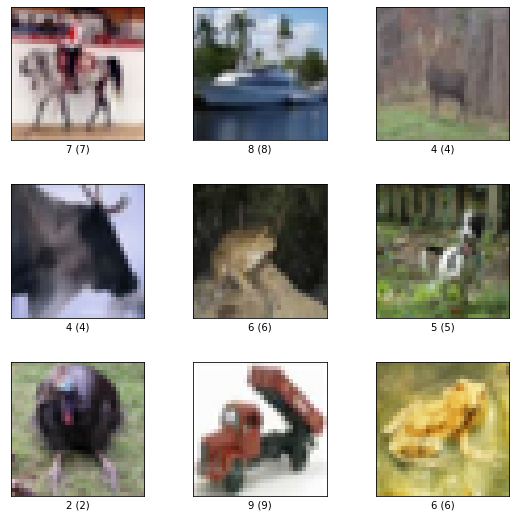

In [6]:
fig = tfds.show_examples(train_data, info)

<a name='5-4'></a>

### 5.4 Building Data Pipelines

Tensorflow datasets are stored as `uint8`, we need to normalize the images while also converting them to `float32` as it is what the model expects.

In [7]:
def preprocess(image, label):

  """ 
  Take image and label, 
  convert images to float32, and return converted image & label
  """

  normalized_img = tf.cast(image, tf.float32)/255.0

  return normalized_img, label

Now, we can apply the above function to the dataset with map. We will also shuffle it, batch the images, cache them to fit into disk, and apply prefetch at the end. This is to make the data faster. 

We do not shuffle the validation and test sets.

In [8]:
def train_data_prep(data, shuffle_size, batch_size):

  data = data.map(preprocess)
  data = data.cache()
  data = data.shuffle(shuffle_size).repeat()
  data = data.batch(batch_size)
  data = data.prefetch(1)

  return data

In [9]:
def test_data_prep(data, batch_size):

  data = data.map(preprocess)
  data = data.batch(batch_size)
  data = data.cache()
  data = data.prefetch(1)

  return data

In [10]:
train_data_prepared = train_data_prep(train_data, 50000, 32)
test_data_prepared = test_data_prep(test_data, 32)
val_data_prepared = test_data_prep(val_data, 32)

<a name='5-5'></a>
### 5.5 Creating and Training a ConvNets

To recall what we saw at the beginning, ConvNets are made of 3 main layers:    

* *A convolution layer* for extracting features in image. Its main hyperparameters are number of filters, filter size which is a tuple of filter height and width, and activation which is `relu` often. 
* *A pooling layer* for shrinking or downsampling the feature maps produced by convolution layer. 
* Fully connected layer for classification purpose. 

Here are other important notes before we train a model:     

* Before training a model, we have to compile it. During model compilation, we specify the loss and optimization function. Loss or cost function is used to calculate the distance between the prediction and actual output. Optimizer is for reducing the loss function. 
* We will use the `sparse_categorical_crossentropy` as a loss function since our labels are in integer format and adam optimizer with learning rate of [`3e-4`](https://twitter.com/karpathy/status/801621764144971776?lang=en) as a starting point. 
* In hidden layers, we will use `relu` activations, but in last fully connected layer, we will use `softmax`.

If you would like to learn more about recipes for training neural networks, I recommend you read this [fantastic blog](http://karpathy.github.io/2019/04/25/recipe/) on exact same topic by Andrej Karpathy. 


In [11]:
from tensorflow.keras import layers

input_shape = (32, 32, 3)

cifar_cnn_1 = tf.keras.models.Sequential([
                                          
          # First conv and pooling layer
          layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape, padding='same'),
          layers.MaxPooling2D(pool_size=2),

          # Second conv and pooling layer
          layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
          layers.MaxPooling2D(pool_size=2),

          # Third conv and pooling layer
          layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'),
          layers.MaxPooling2D(pool_size=2),

          # Fourth conv and pooling layer
          layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'),
          layers.MaxPooling2D(pool_size=2),

          # Flattening layer for converting feature maps into 1D column vector
          layers.Flatten(),

          # Fully connected layers

          layers.Dense(units=128, activation='relu'),
          layers.Dense(units=64, activation='relu'),
          layers.Dense(units=10, activation='softmax')
])

We can display the model summary for a quick overview of what we have built...

In [12]:
cifar_cnn_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

We can also plot the model graph.

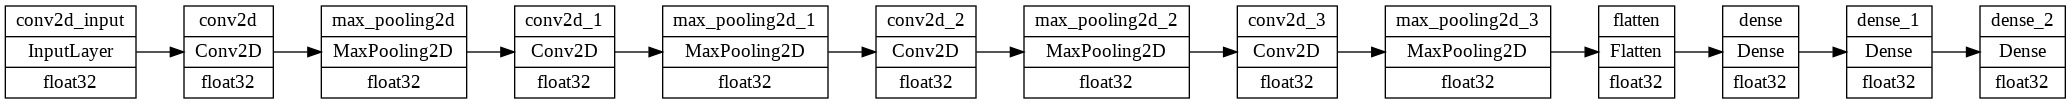

In [13]:
tf.keras.utils.plot_model(cifar_cnn_1, rankdir='LR',show_dtype=True)


And here we compile the model...

In [14]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0003)

cifar_cnn_1.compile(loss='sparse_categorical_crossentropy',
                    optimizer=optimizer,
                    metrics=['accuracy'])

And we finally train the model...

In [16]:
batch_size = 32

train_steps = int(50000/batch_size)
val_steps = int(10000/batch_size)

history = cifar_cnn_1.fit(train_data_prepared, 
                          validation_data=val_data_prepared,
                          epochs=30,
                          steps_per_epoch=train_steps,
                          validation_steps=val_steps)

Epoch 1/30
1562/1562 [==============================] - 39s 13ms/step - loss: 1.5626 - accuracy: 0.4247 - val_loss: 1.2938 - val_accuracy: 0.5267
Epoch 2/30
1562/1562 [==============================] - 20s 13ms/step - loss: 1.1527 - accuracy: 0.5874 - val_loss: 1.0811 - val_accuracy: 0.6096
Epoch 3/30
1562/1562 [==============================] - 20s 13ms/step - loss: 0.9532 - accuracy: 0.6635 - val_loss: 0.9406 - val_accuracy: 0.6660
Epoch 4/30
1562/1562 [==============================] - 20s 13ms/step - loss: 0.8232 - accuracy: 0.7108 - val_loss: 0.8306 - val_accuracy: 0.7107
Epoch 5/30
1562/1562 [==============================] - 20s 13ms/step - loss: 0.7168 - accuracy: 0.7480 - val_loss: 0.8035 - val_accuracy: 0.7214
Epoch 6/30
1562/1562 [==============================] - 19s 12ms/step - loss: 0.6234 - accuracy: 0.7826 - val_loss: 0.8016 - val_accuracy: 0.7266
Epoch 7/30
1562/1562 [==============================] - 19s 12ms/step - loss: 0.5412 - accuracy: 0.8108 - val_loss: 0.7995 -

<a name='5-6'></a>

### 5.6 Visualizing the Results


One of the most important thing to do always is to plot the training and validation metrics. It can help us to know why we are getting certain results and what to do to improve them. 

In [17]:
def plot_metrics(history):
  
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = history.epoch

  plt.figure(figsize=(10,5))
  plt.plot(epochs, acc, 'r', label='Training Accuracy')
  plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
  plt.title('Training and validation accuracy')
  plt.legend(loc=0)

  plt.figure()
  plt.figure(figsize=(10,5))
  plt.plot(epochs, loss, 'b', label='Training Loss')
  plt.plot(epochs, val_loss, 'y', label='Validation Loss')
  plt.title('Training and Validation Loss')
  plt.legend(loc=0)

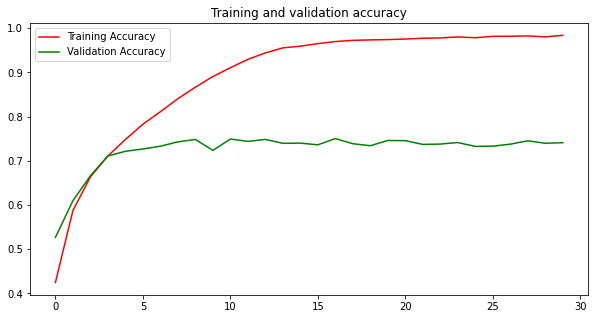

<Figure size 432x288 with 0 Axes>

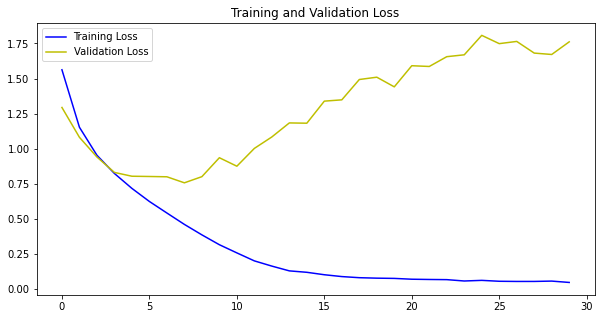

In [18]:
plot_metrics(history)

<a name='5-7'></a>

### 5.7 Improving the Results

Looking from the graph, we are clearly overfitting. Overfitting happens when the model is doing well on training set, but it can't generalize well on validation set. It's usually caused by lack of enough training data or too big model. 

Overfitting can he handled by adding more data, or doing data augmentation, or applying various regularization techniques such as dropout, batch normalization, early stopping, etc...For now, let's try the effect of batch normalization and reduce the size of the model. We will also train for fewer epochs.

In [30]:
cifar_cnn_2 = tf.keras.models.Sequential([
                                          
          # First conv and pooling layer
          layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape, padding='same'),
          layers.BatchNormalization(),
          layers.MaxPooling2D(pool_size=2),

          # Second conv and pooling layer
          layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
          layers.BatchNormalization(),
          layers.MaxPooling2D(pool_size=2),

          # Third conv and pooling layer
          layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'),
          layers.BatchNormalization(),
          layers.MaxPooling2D(pool_size=2),

          # Flattening layer for converting feature maps into 1D column vector
          layers.Flatten(),

          # Fully connected layers
          layers.Dense(units=64, activation='relu'),
          layers.BatchNormalization(),

          layers.Dense(units=10, activation='softmax')
])


cifar_cnn_2.compile(loss='sparse_categorical_crossentropy',
                    optimizer=optimizer,
                    metrics=['accuracy'])


history_2 = cifar_cnn_2.fit(train_data_prepared, 
                          validation_data=val_data_prepared,
                          epochs=10,
                          steps_per_epoch=train_steps,
                          validation_steps=val_steps)

Epoch 1/10
1562/1562 [==============================] - 18s 11ms/step - loss: 1.1873 - accuracy: 0.5830 - val_loss: 1.2012 - val_accuracy: 0.5792
Epoch 2/10
1562/1562 [==============================] - 17s 11ms/step - loss: 0.8441 - accuracy: 0.7065 - val_loss: 0.8758 - val_accuracy: 0.6917
Epoch 3/10
1562/1562 [==============================] - 17s 11ms/step - loss: 0.6975 - accuracy: 0.7602 - val_loss: 0.8321 - val_accuracy: 0.7126
Epoch 4/10
1562/1562 [==============================] - 17s 11ms/step - loss: 0.5908 - accuracy: 0.7947 - val_loss: 0.8124 - val_accuracy: 0.7208
Epoch 5/10
1562/1562 [==============================] - 17s 11ms/step - loss: 0.5005 - accuracy: 0.8273 - val_loss: 0.8570 - val_accuracy: 0.7216
Epoch 6/10
1562/1562 [==============================] - 17s 11ms/step - loss: 0.4319 - accuracy: 0.8509 - val_loss: 0.8328 - val_accuracy: 0.7338
Epoch 7/10
1562/1562 [==============================] - 17s 11ms/step - loss: 0.3639 - accuracy: 0.8729 - val_loss: 0.9262 -

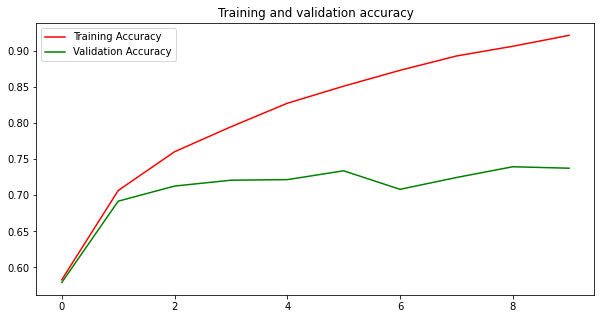

<Figure size 432x288 with 0 Axes>

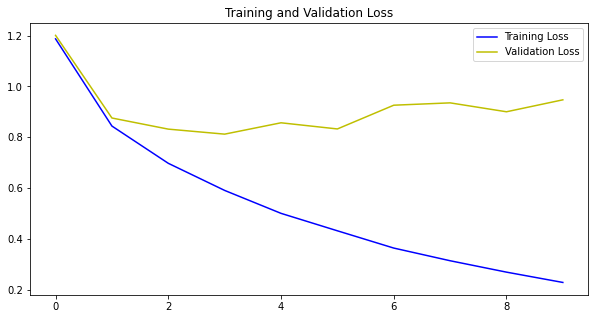

In [31]:
plot_metrics(history_2)

We improved a little bit, but we are still overfitting. There are two things that we can try. One is replacing batch normalization with dropout because they don't plays well together, and two, is to perform data augmentation. We will learn more about data augmentation in later parts, for now let's try dropout.

In [32]:
cifar_cnn_3 = tf.keras.models.Sequential([
                                          
          # First conv and pooling layer
          layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape, padding='same'),
          layers.MaxPooling2D(pool_size=2),

          # Second conv and pooling layer
          layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
          layers.MaxPooling2D(pool_size=2),

          # Third conv and pooling layer
          layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'),
          layers.MaxPooling2D(pool_size=2),

          # Flattening layer for converting feature maps into 1D column vector
          layers.Flatten(),
          layers.Dropout(0.4),

          # Fully connected layers
          layers.Dense(units=128, activation='relu'),
          layers.Dropout(0.5),
          layers.Dense(units=64, activation='relu'),
          layers.Dropout(0.4),
          layers.Dense(units=10, activation='softmax')
])


cifar_cnn_3.compile(loss='sparse_categorical_crossentropy',
                    optimizer=optimizer,
                    metrics=['accuracy'])


history_3 = cifar_cnn_3.fit(train_data_prepared, 
                          validation_data=val_data_prepared,
                          epochs=20,
                          steps_per_epoch=train_steps,
                          validation_steps=val_steps)

Epoch 1/20
1562/1562 [==============================] - 17s 10ms/step - loss: 1.8109 - accuracy: 0.3104 - val_loss: 1.4821 - val_accuracy: 0.4574
Epoch 2/20
1562/1562 [==============================] - 16s 10ms/step - loss: 1.4983 - accuracy: 0.4462 - val_loss: 1.2508 - val_accuracy: 0.5426
Epoch 3/20
1562/1562 [==============================] - 16s 10ms/step - loss: 1.3612 - accuracy: 0.5077 - val_loss: 1.1873 - val_accuracy: 0.5804
Epoch 4/20
1562/1562 [==============================] - 16s 10ms/step - loss: 1.2715 - accuracy: 0.5453 - val_loss: 1.0710 - val_accuracy: 0.6111
Epoch 5/20
1562/1562 [==============================] - 16s 10ms/step - loss: 1.1999 - accuracy: 0.5732 - val_loss: 1.0190 - val_accuracy: 0.6344
Epoch 6/20
1562/1562 [==============================] - 16s 10ms/step - loss: 1.1323 - accuracy: 0.6013 - val_loss: 0.9642 - val_accuracy: 0.6640
Epoch 7/20
1562/1562 [==============================] - 16s 10ms/step - loss: 1.0790 - accuracy: 0.6229 - val_loss: 0.9236 -

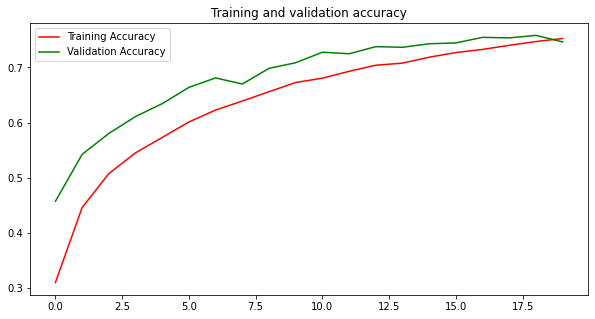

<Figure size 432x288 with 0 Axes>

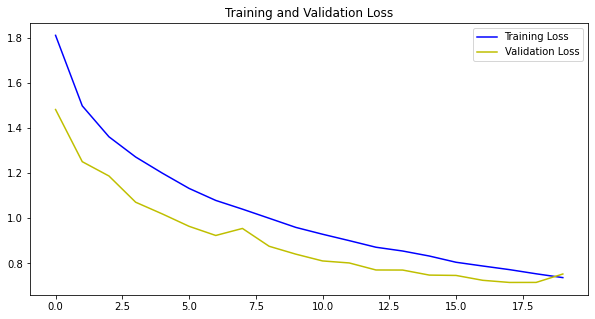

In [33]:
plot_metrics(history_3)

Using dropout does make a big difference. You can also see that if we keep to train, the accuracy can keep increasing. 


In real world projects, you typically would not want to tweak hyperparameters one by one. There are hyperparameters tuning tools that you can try, but even importantly, it's safe to use a pretrained network and finetuning it on a task instead of building your deep network. This is a popular notion nowdays, and that is exactly what you will see in later notebooks. 

<a name='6'></a>

## 6.Final Notes

This was introduction to convolutional neural networks. ConvNets are neural networks architecture that are used in image recognition tasks. We have learned about their main parts which are convolution layers, pooling, and fully connected layers. 

In the later notebooks, we will learn about image data augmentation, and we will later see some commonly used CNN architectures.

Here are references for materials that we used in this notebook: 

* [CNN Explainer](https://poloclub.github.io/cnn-explainer/)
* [CS 230n CNN Cheatsheet](https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-convolutional-neural-networks)
* [CS 231n Lecture, Convolutional Neural Networks](https://www.youtube.com/watch?v=bNb2fEVKeEo&list=PLzUTmXVwsnXod6WNdg57Yc3zFx_f-RYsq&index=5&t=50s)
* [UMI, Lecture 7, Convolutional Networks, Justin Johnson](https://www.youtube.com/watch?v=ANyxBVxmdZ0&list=PL5-TkQAfAZFbzxjBHtzdVCWE0Zbhomg7r&index=7&t=2625s)

### [BACK TO TOP](#0)